# Combine Datasets

In [19]:
import pandas as pd
import numpy as np

df3 = pd.read_csv("./datasets/merged03.txt")
df5 = pd.read_csv("./datasets/merged05.txt")
df6 = pd.read_csv("./datasets/merged06.txt")
df7 = pd.read_csv("./datasets/merged07.txt")
df8 = pd.read_csv("./datasets/merged08.txt")
df9 = pd.read_csv("./datasets/merged09.txt")
df10 = pd.read_csv("./datasets/merged10.txt")
df_all = pd.concat([df3,df5,df6,df7,df8,df9,df10]).reset_index(drop=True)
df_all

,time,mRegistered,mTimeStamp,mPci,mTac,mEarfcn,mMcc+mMnc,ss,rsrp,rsrq,activity,nextAP,handoverOccured,max_ss,max_rsrp,max_rsrq,diff_in_ss,diff_in_rsrp,diff_in_rsrq
0,11-06 17:05:27.823,YES,963103842398,116,16185,2300,310260,19,-106,-10,UNKNOWN,116.0,0,15,-114,-15,4,8,5
1,11-06 17:05:29.918,YES,965204574639,116,16185,2300,310260,21,-102,-9,UNKNOWN,116.0,0,14,-113,-14,7,11,5
2,11-06 17:05:32.381,YES,967695762231,116,16185,2300,310260,22,-106,-12,UNKNOWN,116.0,0,14,-115,-18,8,9,6
3,11-06 17:05:34.873,YES,970146334089,116,16185,2300,310260,22,-103,-12,UNKNOWN,116.0,0,16,-111,-19,6,8,7
4,11-06 17:05:36.886,YES,972200049242,116,16185,2300,310260,20,-103,-10,UNKNOWN,116.0,0,15,-113,-18,5,10,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6556,11-22 15:53:07.812,YES,175929613562557,406,34624,850,310410,22,-100,-10,NOVALUE,406.0,0,24,-91,-12,-2,-9,2
6557,11-22 15:53:09.820,YES,175931744074331,406,34624,850,310410,21,-104,-12,NOVALUE,406.0,0,24,-91,-14,-3,-13,2
6558,11-22 15:53:09.832,YES,175931754969176,406,34624,850,310410,16,-111,-9,NOVALUE,406.0,0,24,-91,-14,-8,-20,5
6559,11-22 15:53:11.845,YES,175933765398127,406,34624,850,310410,17,-113,-13,NOVALUE,406.0,0,24,-91,-14,-7,-22,1


In [20]:
# Remove datapoints with missing activity data
df_all = df_all[df_all['activity'] != "NOVALUE"]

In [21]:
df_all['activity'].value_counts()

WALKING    1860
UNKNOWN    1823
STILL      1816
Name: activity, dtype: int64

In [22]:
df_all['activity_walking'] = 0
df_all["activity_unknown"] = 0
df_all['activity_still'] = 0
#df_all['activity_novalue'] = 0
df_all.loc[df_all['activity'] == "WALKING", 'activity_walking'] = 1
df_all.loc[df_all['activity'] == "UNKNOWN", 'activity_unknown'] = 1
df_all.loc[df_all['activity'] == "STILL", 'activity_still'] = 1
#df_all.loc[df_all['activity'] == "NOVALUE", 'activity_novalue'] = 1

<ipython-input-22-ee39a6017fe7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['activity_walking'] = 0
<ipython-input-22-ee39a6017fe7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all["activity_unknown"] = 0
<ipython-input-22-ee39a6017fe7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [23]:
df_all['handoverOccured'].value_counts()

0    5281
1     218
Name: handoverOccured, dtype: int64

# Balance Dataset

In [25]:
pos_df_all = df_all[df_all['handoverOccured'] == 1]
neg_df_all = df_all[df_all['handoverOccured'] == 0]

In [26]:
SAMPLES_PER_CLASS = len(pos_df_all)
neg_samples = neg_df_all.sample(SAMPLES_PER_CLASS)
resampled_df = pd.concat([pos_df_all, neg_samples])
resampled_df

,time,mRegistered,mTimeStamp,mPci,mTac,mEarfcn,mMcc+mMnc,ss,rsrp,rsrq,...,handoverOccured,max_ss,max_rsrp,max_rsrq,diff_in_ss,diff_in_rsrp,diff_in_rsrq,activity_walking,activity_unknown,activity_still
142,11-06 17:13:06.968,YES,1366721945471,116,16185,2300,310260,20,-110,-17,...,1,12,-113,-14,8,3,-3,1,0,0
154,11-06 17:14:04.621,YES,1386078954743,99,16185,2300,310260,19,-113,-18,...,1,15,-107,-14,4,-6,-4,1,0,0
261,11-06 17:21:06.485,YES,1553086144661,44,16185,675,310260,31,-81,-20,...,1,31,-76,-9,0,-5,-11,1,0,0
296,11-06 17:22:58.934,YES,1623956480315,434,16185,2300,310260,31,-86,-19,...,1,31,-74,-8,0,-12,-11,0,1,0
320,11-06 17:24:03.438,YES,1676989424036,328,16185,2300,310260,27,-100,-19,...,1,31,-73,-14,-4,-27,-5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,11-07 17:31:53.648,YES,23576819594788,473,16169,675,310260,25,-92,-9,...,0,20,-98,-15,5,6,6,0,0,1
2282,11-07 19:09:55.174,YES,25082575931092,456,34635,850,310410,29,-80,-3,...,0,19,-94,-10,10,14,7,0,0,1
1074,11-07 17:27:28.625,YES,23492170404844,473,16169,675,310260,18,-105,-9,...,0,13,-116,-17,5,11,8,0,0,1
2001,11-07 18:51:53.758,YES,24527816524161,322,16169,2300,310260,29,-88,-12,...,0,24,-87,-8,5,-1,-4,0,0,1


# Create Train and Test Data

# Train NN

In [61]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
def get_metrics_on_nn_with_features_removed(features_to_remove):
    features_of_interest = ["ss", "rsrq", "rsrp", "max_ss", "max_rsrp", "max_rsrq", "diff_in_ss", "diff_in_rsrq", "diff_in_rsrp", "activity_walking", "activity_unknown", "activity_still"]
    for feature in features_to_remove:
        features_of_interest.remove(feature)
    X = resampled_df[features_of_interest].values
    y = resampled_df['handoverOccured'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                    test_size=0.33, random_state=42, stratify=y)

    model = keras.Sequential(
        [
            layers.Dense(1000, activation="relu", name="layer1"),
            layers.Dense(1000, activation="relu", name="layer2"),
            layers.Dense(1000, activation="relu", name="layer3"),
            layers.Dense(1000, activation="relu", name="layer4"),
            layers.Dense(1, activation="sigmoid", name="layer5"),
        ]
    )
    # Call model on a test input
    y = model(X[0:2])

    model.compile(
        optimizer=keras.optimizers.RMSprop(
            learning_rate=0.000001
        ),  # Optimizer
        # Loss function to minimize
        loss="binary_crossentropy",
        metrics=["accuracy"] # tf.keras.metrics.Recall(), tf.keras.metrics.Precision()
    )

    def scheduler(epoch,lr):
        if epoch < 15: 
            return lr
        else: 
            return lr * tf.math.exp(-0.1)

    lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
    callbacks = [lr_callback]

    history = model.fit(
        X_train,
        y_train,
        batch_size=5,
        epochs=50,
        callbacks=callbacks,
        validation_data=(X_test, y_test),
        verbose=0
    )
    best_loss = min(history.history['val_loss'])
    best_accuracy = max(history.history['val_accuracy'])

    return {
        "best_loss": best_loss,
        "best_accuracy": best_accuracy
    }
# Accuracy with all features
performance_dict = {}
performance_dict["base"] = get_metrics_on_nn_with_features_removed([])
performance_dict["base"]

In [35]:
performance_dict["only_registered_features"] = get_metrics_on_nn_with_features_removed(["max_ss", "max_rsrp", "max_rsrq","diff_in_ss", "diff_in_rsrq", "diff_in_rsrp"])
performance_dict["only_registered_features"]

{'best_loss': 0.5937851071357727, 'best_accuracy': 0.8333333134651184}

In [38]:
activity_features = ["activity_walking", "activity_unknown", "activity_still"]
performance_dict["no_activity_features"] = get_metrics_on_nn_with_features_removed(activity_features)
performance_dict["no_activity_features"]

{'best_loss': 0.550151526927948, 'best_accuracy': 0.7638888955116272}

In [39]:
basic_features = ["ss", "rsrp", 'rsrq']
performance_dict["no_basic_features"] = get_metrics_on_nn_with_features_removed(basic_features)
performance_dict["no_basic_features"]

{'best_loss': 0.5609530210494995, 'best_accuracy': 0.7291666865348816}

In [40]:
performance_dict['only_basic_features'] = get_metrics_on_nn_with_features_removed(["max_ss", "max_rsrp", "max_rsrq", "diff_in_ss", "diff_in_rsrq", "diff_in_rsrp", "activity_walking", "activity_unknown", "activity_still"])
performance_dict['only_basic_features']

{'best_loss': 0.5628868937492371, 'best_accuracy': 0.8333333134651184}

In [41]:
performance_dict['only_rsrq'] = get_metrics_on_nn_with_features_removed(["ss", "rsrp","max_ss", "max_rsrp", "max_rsrq", "diff_in_ss", "diff_in_rsrq", "diff_in_rsrp", "activity_walking", "activity_unknown", "activity_still"])
performance_dict['only_rsrq']

{'best_loss': 0.6765207052230835, 'best_accuracy': 0.5}

In [42]:
performance_dict['only_rsrp'] = get_metrics_on_nn_with_features_removed(["ss", "rsrq","max_ss", "max_rsrp", "max_rsrq", "diff_in_ss", "diff_in_rsrq", "diff_in_rsrp", "activity_walking", "activity_unknown", "activity_still"])
performance_dict['only_rsrp']

{'best_loss': 0.692344605922699, 'best_accuracy': 0.5972222089767456}

In [43]:
performance_dict['only_ss'] = get_metrics_on_nn_with_features_removed(["rsrp", "rsrq","max_ss", "max_rsrp", "max_rsrq", "diff_in_ss", "diff_in_rsrq", "diff_in_rsrp", "activity_walking", "activity_unknown", "activity_still"])
performance_dict['only_ss']

{'best_loss': 0.6929172277450562, 'best_accuracy': 0.5}

In [56]:
for key, v in performance_dict.items():
    print(key,v)

base {'best_loss': 0.5321290493011475, 'best_accuracy': 0.7708333134651184}
no_activity_features {'best_loss': 0.550151526927948, 'best_accuracy': 0.7638888955116272}
no_basic_features {'best_loss': 0.5609530210494995, 'best_accuracy': 0.7291666865348816}
only_basic_features {'best_loss': 0.5628868937492371, 'best_accuracy': 0.8333333134651184}
only_rsrq {'best_loss': 0.6765207052230835, 'best_accuracy': 0.5}
only_rsrp {'best_loss': 0.692344605922699, 'best_accuracy': 0.5972222089767456}
only_ss {'best_loss': 0.6929172277450562, 'best_accuracy': 0.5}


In [47]:

# features_of_interest = ["ss", "rsrq", "rsrp", "max_ss", "max_rsrp", "max_rsrq","diff_in_ss", "diff_in_rsrq", "diff_in_rsrp", "activity_walking", "activity_unknown", "activity_still"]
# performance_dict["base"] = get_metrics_on_nn_with_features_removed([])
# for feature in features_of_interest:
#     performance_dict[f'no_{feature}'] = get_metrics_on_nn_with_features_removed([feature])

Text(0.5, 1.0, 'Change In Loss From Removing Feature')

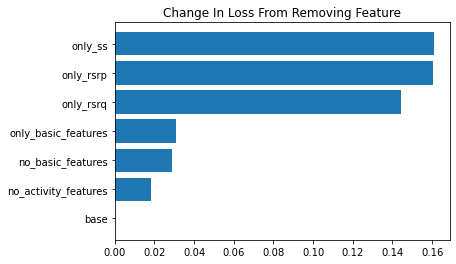

In [58]:
import matplotlib.pyplot as plt
base = performance_dict['base']["best_loss"]
plt.barh(list(performance_dict.keys()),[val["best_loss"] - base for key,val in performance_dict.items()])
plt.title("Change In Loss From Removing Feature")

Text(0.5, 1.0, 'Change In Accuracy From Removing Feature')

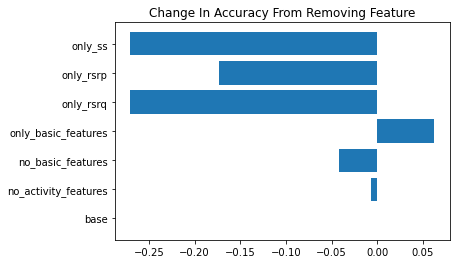

In [59]:
import matplotlib.pyplot as plt
base = performance_dict['base']["best_accuracy"]
plt.barh(list(performance_dict.keys()),[val["best_accuracy"] - base for key,val in performance_dict.items()])
plt.title("Change In Accuracy From Removing Feature")

In [38]:
performance_dict

{'base': (0.5497999787330627, 0.754601240158081),
 'no_ss': (0.5596362352371216, 0.7668711543083191),
 'no_rsrq': (0.6068814992904663, 0.7423312664031982),
 'no_rsrp': (0.5677207708358765, 0.7423312664031982),
 'no_max_ss': (0.5638781785964966, 0.7484662532806396),
 'no_max_rsrp': (0.5539535284042358, 0.754601240158081),
 'no_max_rsrq': (0.5536408424377441, 0.7484662532806396),
 'no_diff_in_ss': (0.5607701539993286, 0.7607361674308777),
 'no_diff_in_rsrq': (0.6079888343811035, 0.7484662532806396),
 'no_diff_in_rsrp': (0.5857520699501038, 0.754601240158081),
 'no_activity_walking': (0.5577619075775146, 0.754601240158081),
 'no_activity_unknown': (0.5504615902900696, 0.7730061411857605),
 'no_activity_still': (0.5576903223991394, 0.7361963391304016),
 'no_activity_novalue': (0.5644530057907104, 0.7300613522529602)}

In [39]:
# Try Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
clf = LogisticRegression(random_state=0).fit(scaler.transform(X_train), y_train)
y_train_pred = clf.predict(scaler.transform(X_train))
y_test_pred = clf.predict(scaler.transform(X_test))
train_acc = np.mean(y_train == y_train_pred)
test_acc = np.mean(y_test_pred == y_test)
train_acc, test_acc

NameError: name 'X_train' is not defined

In [ ]:
import matplotlib.pyplot as plt
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

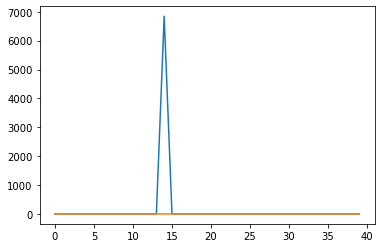

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

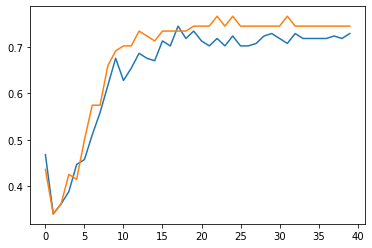

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [62]:
# Final Model 
features_of_interest = ["ss", "rsrq", "rsrp"]
X = resampled_df[features_of_interest].values
y = resampled_df['handoverOccured'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                test_size=0.33, random_state=42, stratify=y)

model = keras.Sequential(
    [
        layers.Dense(1000, activation="relu", name="layer1"),
        layers.Dense(1000, activation="relu", name="layer2"),
        layers.Dense(1000, activation="relu", name="layer3"),
        layers.Dense(1000, activation="relu", name="layer4"),
        layers.Dense(1, activation="sigmoid", name="layer5"),
    ]
)
# Call model on a test input
y = model(X[0:2])

model.compile(
    optimizer=keras.optimizers.RMSprop(
        learning_rate=0.000001
    ),  # Optimizer
    # Loss function to minimize
    loss="binary_crossentropy",
    metrics=["accuracy"] # tf.keras.metrics.Recall(), tf.keras.metrics.Precision()
)

def scheduler(epoch,lr):
    if epoch < 15: 
        return lr
    else: 
        return lr * tf.math.exp(-0.1)

lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
callbacks = [lr_callback]

history = model.fit(
    X_train,
    y_train,
    batch_size=5,
    epochs=50,
    callbacks=callbacks,
    validation_data=(X_test, y_test),
    verbose=1
)
best_loss = min(history.history['val_loss'])
best_accuracy = max(history.history['val_accuracy'])
result = {
    "best_loss": best_loss,
    "best_accuracy": best_accuracy
}

Epoch 1/50
59/59 [==============================] - 2s 26ms/step - loss: 0.7218 - accuracy: 0.4795 - val_loss: 0.7097 - val_accuracy: 0.4236 - lr: 1.0000e-06
Epoch 2/50
59/59 [==============================] - 1s 22ms/step - loss: 0.6933 - accuracy: 0.4932 - val_loss: 0.6954 - val_accuracy: 0.4306 - lr: 1.0000e-06
Epoch 3/50
59/59 [==============================] - 1s 23ms/step - loss: 0.6825 - accuracy: 0.5616 - val_loss: 0.6789 - val_accuracy: 0.6667 - lr: 1.0000e-06
Epoch 4/50
59/59 [==============================] - 1s 22ms/step - loss: 0.6694 - accuracy: 0.6096 - val_loss: 0.6659 - val_accuracy: 0.5417 - lr: 1.0000e-06
Epoch 5/50
59/59 [==============================] - 1s 23ms/step - loss: 0.6623 - accuracy: 0.6370 - val_loss: 0.6553 - val_accuracy: 0.7708 - lr: 1.0000e-06
Epoch 6/50
59/59 [==============================] - 1s 23ms/step - loss: 0.6534 - accuracy: 0.6678 - val_loss: 0.6468 - val_accuracy: 0.7986 - lr: 1.0000e-06
Epoch 7/50
59/59 [==============================] - 

In [120]:
def tpr(mat):
    t = mat[0][0]
    a = mat[0][0] + mat[0][1]
    return t/a

def fpr(mat):
    t = mat[1][1]
    a = mat[1][0] + mat[1][1]
    return t/a
tpr(confusion_matrix), fpr(confusion_matrix)

(0.7402007195606892, 0.7935779816513762)

14/14 [==============================] - 0s 3ms/step


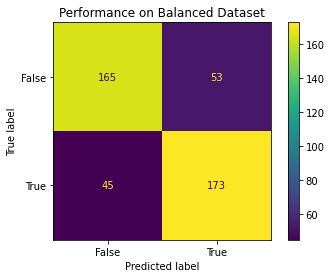

0.7568807339449541 0.7935779816513762


In [122]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

y_prob = model.predict(X).flatten()
y_pred = np.where(y_prob > 0.5, 1,0)
confusion_matrix = metrics.confusion_matrix(y, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()

plt.title("Performance on Balanced Dataset")
plt.show()

print(tpr(confusion_matrix), fpr(confusion_matrix))

172/172 [==============================] - 1s 3ms/step


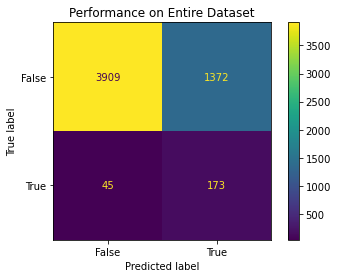

0.7402007195606892 0.7935779816513762


In [123]:
X_all = df_all[features_of_interest].values
y_all = df_all['handoverOccured'].values
y_all_prob = model.predict(X_all).flatten()
y_all_pred = np.where(y_all_prob > 0.5, 1,0)

confusion_matrix = metrics.confusion_matrix(y_all, y_all_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()

plt.title("Performance on Entire Dataset")
plt.show()

print(tpr(confusion_matrix), fpr(confusion_matrix))


# Create Dataset over multiple timesteps

In [ ]:
# N x T x F
df_all[features_of_interest]

,ss,rsrq,rsrp,max_ss,max_rsrp,max_rsrq,diff_in_ss,diff_in_rsrq,diff_in_rsrp
0,19,-10,-106,15,-114,-15,4,5,8
1,21,-9,-102,14,-113,-14,7,5,11
2,22,-12,-106,14,-115,-18,8,6,9
3,22,-12,-103,16,-111,-19,6,7,8
4,20,-10,-103,15,-113,-18,5,8,10
...,...,...,...,...,...,...,...,...,...
3317,11,-17,-123,7,-126,-18,4,1,3
3318,10,-18,-125,6,-130,-18,4,0,5
3319,10,-20,-127,6,-128,-17,4,-3,1
3320,9,-20,-130,0,-1000,-1000,9,980,870
